In [1]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
training_data = pd.read_csv("moon_data_train.csv", header=None)
evaluation_data = pd.read_csv("moon_data_eval.csv", header=None)

In [4]:
training_data.head()

,0,1,2
0,1,0.610651,-0.459646
1,1,-0.555537,0.730968
2,0,-0.584957,0.663385
3,1,1.197523,-0.694940
4,0,-0.554557,0.796670


In [5]:
training_data.shape

(2000, 3)

In [6]:
evaluation_data.head()

,0,1,2
0,0,-0.500569,0.687106
1,1,0.190068,-0.341117
2,0,0.995020,0.663293
3,0,-1.030537,0.342393
4,1,0.037675,-0.836548


In [7]:
evaluation_data.shape

(1000, 3)

In [8]:
training_data.columns = ['Class', 'Attr1', 'Attr2']
evaluation_data.columns = ['Class', 'Attr1', 'Attr2']
training_data.head()

,Class,Attr1,Attr2
0,1,0.610651,-0.459646
1,1,-0.555537,0.730968
2,0,-0.584957,0.663385
3,1,1.197523,-0.694940
4,0,-0.554557,0.796670


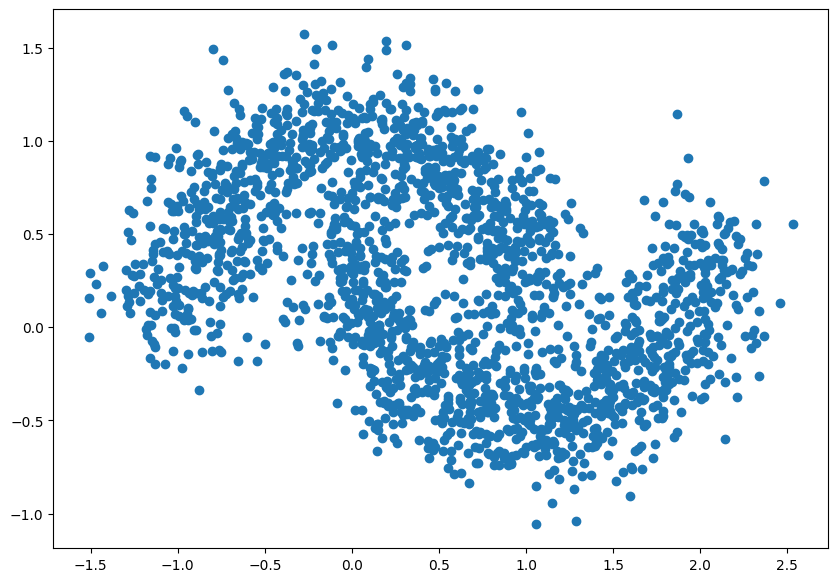

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(training_data['Attr1'], training_data['Attr2'])

In [10]:
model = Sequential()

In [11]:
#Dense(50, input_dim = 2..) means 2 input neurons are connected to dense layer that has 50 neurons and
#at each neuron in dense layer the activation function relu is applied for computing the output of that neuron.
model.add(Dense(50, input_dim=2, activation='relu'))
#The 50 neurons in the hidden layer are then connected to one neuron in the output layer with activation function of sigmoid.
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#‘Binary Crossentropy’ loss function is used as there are 2 classes in our prediction problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
#prep the data for training and testing
X_train = training_data.iloc[:,[1,2]].values
X_test = evaluation_data.iloc[:,[1,2]].values
y_train = training_data.iloc[:,0].values
y_test = evaluation_data.iloc[:,0].values

In [15]:
#train the model
results = model.fit(X_train, y_train , epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8172 - loss: 0.6000
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8155 - loss: 0.4475
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3621
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8694 - loss: 0.3030
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8870 - loss: 0.2831
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8738 - loss: 0.2974
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8760 - loss: 0.2859
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8832 - loss: 0.2679
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8951 - loss: 0.2521
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8840 - loss: 0.2565
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8877 - loss: 0.2681
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy:

In [16]:
predictions=model.predict(X_test)

#transaform the predictions from countinuous to binary
y_pred = np.round(predictions).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[484  13]
 [ 19 484]] 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       497
           1       0.97      0.96      0.97       503

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Accuracy: 0.968
AUC: 0.9680348492545731


In [18]:
#************************************************
#****         Convolutional Network          ****
#************************************************

from keras.datasets import mnist

#load the data and split it for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


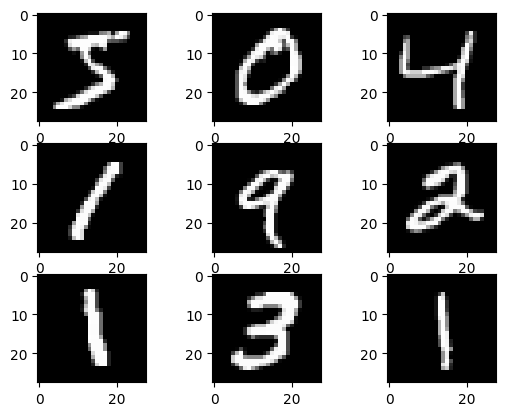

In [20]:
#plotting
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [21]:
# convert from integers to floats and normalize to range [0,1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train.shape

(60000, 28, 28)

In [22]:
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [23]:
# convert class vectors to binary class matrices
from tensorflow import keras

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [25]:
# define cnn model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.8941 - loss: 0.3479 - val_accuracy: 0.9840 - val_loss: 0.0585
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9841 - loss: 0.0557 - val_accuracy: 0.9835 - val_loss: 0.0577
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9894 - loss: 0.0344 - val_accuracy: 0.9843 - val_loss: 0.0550
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9934 - loss: 0.0222 - val_accuracy: 0.9865 - val_loss: 0.0543
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9960 - loss: 0.0148 - val_accuracy: 0.9882 - val_loss: 0.0527
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9977 - loss: 0.0099 - val_accuracy: 0.9875 - val_loss: 0.0591
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 0.9868 - val_loss: 0.0559
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9977 - loss: 0.0074 - 

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05672263354063034
Test accuracy: 0.9861999750137329


In [28]:
predictions=model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[2.3205757e-16, 1.1637272e-12, 3.1172645e-10, ..., 9.9999994e-01,
        1.8144073e-14, 1.3630337e-12],
       [8.8343334e-15, 3.4638973e-07, 9.9999958e-01, ..., 1.5148271e-16,
        2.7245185e-16, 1.2019769e-14],
       [9.2245358e-09, 9.9999148e-01, 7.6571041e-08, ..., 6.4669948e-06,
        1.8297227e-07, 7.7419637e-10],
       ...,
       [2.7820335e-22, 3.3082081e-16, 1.1174656e-18, ..., 1.4151651e-11,
        1.7370337e-12, 2.4784430e-12],
       [5.0890070e-15, 3.6480197e-17, 2.6018591e-15, ..., 5.3125749e-18,
        6.3972000e-10, 1.1545481e-19],
       [2.4461349e-13, 6.8429183e-14, 1.3507000e-11, ..., 4.8716772e-16,
        3.9356997e-11, 2.8439528e-18]], dtype=float32)

In [29]:
#transaform the predictions from countinuous to binary
y_pred = np.round(predictions).astype(int)
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test, y_pred), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[[9009   11]
  [  11  969]]

 [[8854   11]
  [   7 1128]]

 [[8935   33]
  [   9 1023]]

 [[8980   10]
  [  14  996]]

 [[9009    9]
  [  10  972]]

 [[9090   18]
  [  11  881]]

 [[9038    4]
  [  17  941]]

 [[8958   14]
  [  17 1011]]

 [[9019    7]
  [  16  958]]

 [[8978   13]
  [  28  981]]] 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
